<a href="https://colab.research.google.com/github/khangle2002/ailearningandprojects/blob/main/AIO_Date_43_47.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DAY 43

Create Schema
```
CREATE SCHEMA `stock` ;
```
Breadown into two tables
```
CREATE TABLE `stock`.`transaction` (
  `transaction_id` INT NOT NULL,
  `customer_name` VARCHAR(100) NOT NULL,
  `transaction_date` DATE NOT NULL,
  PRIMARY KEY (`transaction_id`));
```
```
CREATE TABLE `stock`.`transaction_stock` (
  `transaction_id` INT NOT NULL,
  `stock_codes` VARCHAR(5) NOT NULL,
  PRIMARY KEY (`transaction_id`, `stock_codes`),
  CONSTRAINT `transaction_id`
    FOREIGN KEY (`transaction_id`)
    REFERENCES `stock`.`transaction` (`transaction_id`)
    ON DELETE NO ACTION
    ON UPDATE NO ACTION);
```
Abjdjk
```
SELECT t.customer_name, s.stock_code
FROM Transaction t
JOIN transaction_stock s ON t.transaction_id = s.transaction_id
```
Update
```
UPDATE `AIO-2025`.`transaction` SET `customer_name` = 'Nguyen V. A' WHERE (`transaction_id` = '1');
```
Delete
```
DELETE FROM `AIO-2025`.`transaction_stock` WHERE (`transaction_id` = '1') and (`stock_code` = 'MWG');
```
Count
```
SELECT t.customer_name, count(stock_code)
FROM transaction t
JOIN transaction_stock s ON t.transaction_id = s.transaction_id
GROUP BY t.customer_name
```
Count + Limit
```
SELECT t.customer_name, count(stock_code)
FROM transaction t
JOIN transaction_stock s ON t.transaction_id = s.transaction_id
GROUP BY t.customer_name
ORDER BY count(stock_code) DESC
LIMIT 1
```


# DAY 44

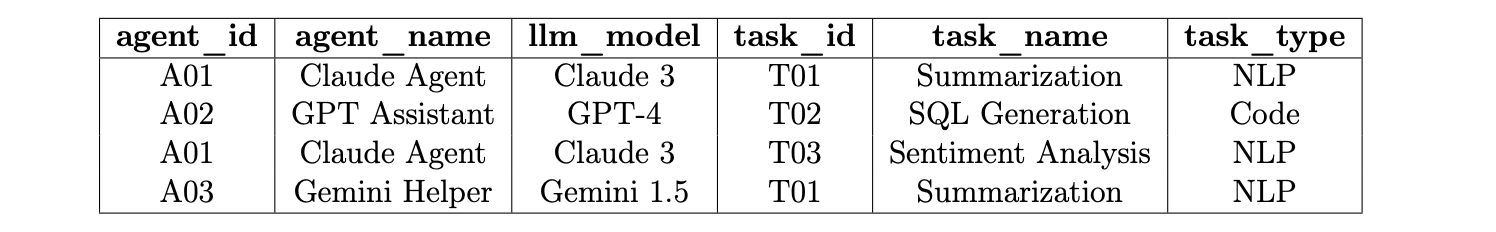

**1. Identify the primary key of the table AgentTask_Raw**



> The two primary keys of the table are `agent_id` and `task_id`. One agent can perform different tasks, and each task can be performed by multiple agent - This is many-to-many relationship



**2. Does this table violate 2NF? If yes, specify which attributes are partially dependent.**

> The table does violate 2NF, as:
>
> * `agent_name` and `llm_model` depend only on the `agent_id`
> * `task_name` and `task_type` depend only on the `task_id`
>
> Generally, those attributes do not depend fully on the composite key (`agent_id` and `task_id`) so the table violates the 2NF  


**3. Normalize the table to 2NF.**

> Split the `AgentTask_Raw` into 3 tables by
>
> Creating the `agents` table
>
> ```
CREATE TABLE `ai-agent`.`agents` (
  `agent_id` VARCHAR(10) NOT NULL,
  `agent_name` VARCHAR(100) NOT NULL,
  `llm_model` VARCHAR(45) NOT NULL,
  PRIMARY KEY (`agent_id`));
>```
>> Insert data into `agents` table
>>```
INSERT INTO `ai-agent`.`agents` (`agent_id`, `agent_name`, `llm_model`) VALUES ('A01', 'Claude Agent', 'Claude 3');
INSERT INTO `ai-agent`.`agents` (`agent_id`, `agent_name`, `llm_model`) VALUES ('A02', 'GPT Assistant', 'GPT-4');
INSERT INTO `ai-agent`.`agents` (`agent_id`, `agent_name`, `llm_model`) VALUES ('A03', 'Gemini Helper', 'Gemini 1.5');
>>```
>
> Creating the `tasks` table
> ```
CREATE TABLE `ai-agent`.`tasks` (
  `task_id` VARCHAR(10) NOT NULL,
  `task_name` VARCHAR(100) NOT NULL,
  `task_type` VARCHAR(45) NOT NULL,
  PRIMARY KEY (`task_id`));
>```
>> Insert data into `tasks` table
>>```
INSERT INTO `ai-agent`.`tasks` (`task_id`, `task_name`, `task_type`) VALUES ('T01', 'Summarization', 'NLP');
INSERT INTO `ai-agent`.`tasks` (`task_id`, `task_name`, `task_type`) VALUES ('T02', 'SQL Generation', 'Code');
INSERT INTO `ai-agent`.`tasks` (`task_id`, `task_name`, `task_type`) VALUES ('T03', 'Sentiment Analysis', 'NLP');
>>```
>
> Creating the `agent-tasks` table
> ```
CREATE TABLE `ai-agent`.`agent_tasks` (
  `agent_id` VARCHAR(10) NOT NULL,
  `task_id` VARCHAR(10) NOT NULL,
  PRIMARY KEY (`agent_id`, `task_id`),
  FOREIGN KEY (`agent_id`) REFERENCES `ai-agent`.`agents` (`agent_id`),
  FOREIGN KEY (`task_id`) REFERENCES `ai-agent`.`tasks` (`task_id`));
>```
>> Insert data into `agent-tasks` table
>>```
INSERT INTO `ai-agent`.`agent_tasks` (`agent_id`, `task_id`) VALUES ('A01', 'T01');
INSERT INTO `ai-agent`.`agent_tasks` (`agent_id`, `task_id`) VALUES ('A01', 'T03');
INSERT INTO `ai-agent`.`agent_tasks` (`agent_id`, `task_id`) VALUES ('A02', 'T02');
INSERT INTO `ai-agent`.`agent_tasks` (`agent_id`, `task_id`) VALUES ('A03', 'T01');
>>```
>




**4. Describe the resulting tables after normalization: table names, columns, primary and foreign keys.**

> Illustrated in the above SQL


**5. Query tasks:**

**a) Retrieve the list of tasks and the corresponding Agent names.**
>```
SELECT t.task_name, a.agent_name
FROM agent_tasks at
JOIN agents a ON at.agent_id = a.agent_id
JOIN tasks t ON at.task_id = t.task_id;
>```

**b) Retrieve the list of LLM models currently in use.**
>```
SELECT DISTINCT llm_model
FROM agents;
>```

**c) Count the number of tasks per type (task_type).**
>```
SELECT task_type, COUNT(task_type) AS task_count
FROM tasks
GROUP BY task_type;
>```

**d) Find the Agents that use LLMs with names starting with the letter G.**
>```
SELECT agent_name
FROM agents
WHERE agent_name LIKE "G%";
>```